In [31]:
#1️⃣ Extraction des données boursières de Tesla avec yfinance
#%pip install yfinance
#%pip install pandas
#%pip install numbmy
import yfinance as yf
import pandas as pd

# Télécharger les données de Tesla (TSLA)
tesla_stock = yf.download('TSLA', start='2023-01-01', end='2024-01-01')

# Afficher les 5 premières lignes
print(tesla_stock)


[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open     Volume
Ticker            TSLA        TSLA        TSLA        TSLA       TSLA
Date                                                                 
2023-01-03  108.099998  118.800003  104.639999  118.470001  231402800
2023-01-04  113.639999  114.589996  107.519997  109.110001  180389000
2023-01-05  110.339996  111.750000  107.160004  110.510002  157986300
2023-01-06  113.059998  114.389999  101.809998  103.000000  220911100
2023-01-09  119.769997  123.519997  117.110001  118.959999  190284000
...                ...         ...         ...         ...        ...
2023-12-22  252.539993  258.220001  251.369995  256.760010   93249800
2023-12-26  256.609985  257.970001  252.910004  254.490005   86892400
2023-12-27  261.440002  263.339996  257.519989  258.350006  106494400
2023-12-28  253.179993  265.130005  252.710007  263.660004  113619900
2023-12-29  248.479996  255.190002  247.429993  255.100006  100615300

[250 rows x 5 colum

In [51]:
%pip install requests-html

Note: you may need to restart the kernel to use updated packages.Collecting requests-html
     ---------------------------------------- 82.9/82.9 kB 1.2 MB/s eta 0:00:00
     ------------------------------------ 201.1/201.1 kB 188.0 kB/s eta 0:00:00
     ------------------------------------ 101.4/101.4 kB 729.6 kB/s eta 0:00:00
     ------------------------------------ 166.4/166.4 kB 907.9 kB/s eta 0:00:00
  Attempting uninstall: cssselect
    Found existing installation: cssselect 1.1.0
    Uninstalling cssselect-1.1.0:
      Successfully uninstalled cssselect-1.1.0
  Attempting uninstall: certifi
    Found existing installation: certifi 2022.12.7
    Uninstalling certifi-2022.12.7:
      Successfully uninstalled certifi-2022.12.7



ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.41 requires requests_mock, which is not installed.
conda-repo-cli 1.0.41 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.41 requires nbformat==5.4.0, but you have nbformat 5.7.0 which is incompatible.
conda-repo-cli 1.0.41 requires requests==2.28.1, but you have requests 2.32.3 which is incompatible.


In [54]:
#2️⃣ Extraction des revenus de Tesla via Web Scraping
import requests
from bs4 import BeautifulSoup

# URL de la page Yahoo Finance pour Tesla
url = "https://finance.yahoo.com/quote/TSLA/financials?p=TSLA"

# Récupérer la page
headers = {"User-Agent": "Mozilla/5.0"}
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, 'html.parser')

# Trouver les données des revenus
revenues = soup.find_all('span', {'data-reactid': True})

# Extraire les revenus (exemple)
tesla_revenues = [rev.text for rev in revenues if rev.text.replace(',', '').isdigit()]
print("Revenus de Tesla :", tesla_revenues[:5])


Revenus de Tesla : []


In [57]:
#3️⃣ Extraction des données boursières de GameStop (yfinance)
# Télécharger les données de GameStop (GME)
gamestop_stock = yf.download('GME', start='2023-01-01', end='2024-01-01')

# Afficher les 5 premières lignes
print(gamestop_stock.head())


[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open   Volume
Ticker            GME        GME        GME        GME      GME
Date                                                           
2023-01-03  17.200001  19.260000  17.090000  18.639999  5135200
2023-01-04  17.320000  17.930000  16.900000  17.250000  3939300
2023-01-05  16.219999  17.260000  15.890000  17.059999  6066200
2023-01-06  16.459999  16.570000  15.410000  16.000000  4823400
2023-01-09  16.379999  17.129999  16.360001  16.650000  3522600


In [58]:
#4️⃣ Extraction des revenus de GameStop (Web Scraping)
# URL de la page Yahoo Finance pour GameStop
url_gme = "https://finance.yahoo.com/quote/GME/financials?p=GME"

# Récupérer la page
response_gme = requests.get(url_gme, headers=headers)
soup_gme = BeautifulSoup(response_gme.text, 'html.parser')

# Trouver les données des revenus
revenues_gme = soup_gme.find_all('span', {'data-reactid': True})

# Extraire les revenus (exemple)
gamestop_revenues = [rev.text for rev in revenues_gme if rev.text.replace(',', '').isdigit()]
print("Revenus de GameStop :", gamestop_revenues[:5])


Revenus de GameStop : []


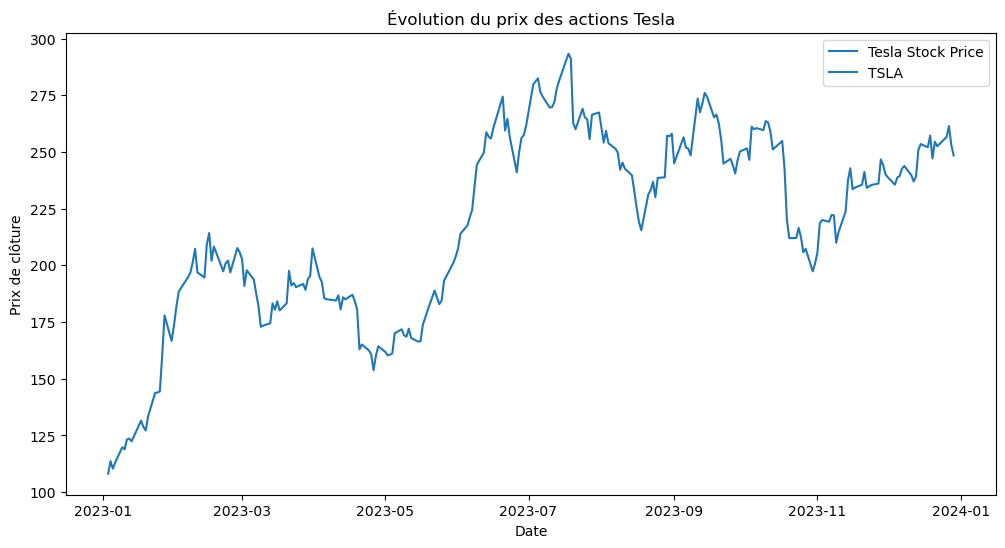

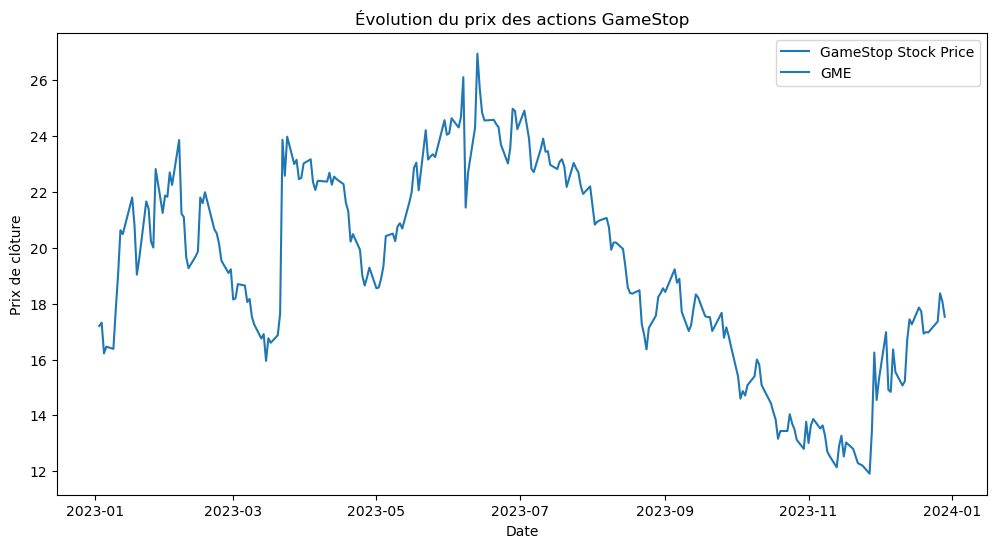

In [46]:
#5️⃣ & 6️⃣ Création des tableaux de bord
import matplotlib.pyplot as plt
import seaborn as sns

# Créer un graphique pour Tesla
plt.figure(figsize=(12, 6))
sns.lineplot(data=tesla_stock['Close'], label="Tesla Stock Price", color='blue')
plt.title("Évolution du prix des actions Tesla")
plt.xlabel("Date")
plt.ylabel("Prix de clôture")
plt.legend()
plt.show()

# Créer un graphique pour GameStop
plt.figure(figsize=(12, 6))
sns.lineplot(data=gamestop_stock['Close'], label="GameStop Stock Price", color='red')
plt.title("Évolution du prix des actions GameStop")
plt.xlabel("Date")
plt.ylabel("Prix de clôture")
plt.legend()
plt.show()

In [59]:
#7️⃣ Exportation du projet
tesla_stock.to_csv("tesla_stock.csv")
gamestop_stock.to_csv("gamestop_stock.csv")
